In [233]:
from music21 import *
from pattern import *

In [154]:
corpus.search('bach')


<music21.metadata.bundles.MetadataBundle {564 entries}>

In [155]:
corpus.search('bach', fileExtensions='xml')


<music21.metadata.bundles.MetadataBundle {412 entries}>

In [156]:
chorales = corpus.search('bach', fileExtensions='xml')


In [157]:
chorales[1]

<music21.metadata.bundles.MetadataEntry: bach_bwv10_7_mxl>

In [158]:
bwv10 = chorales[1].parse()


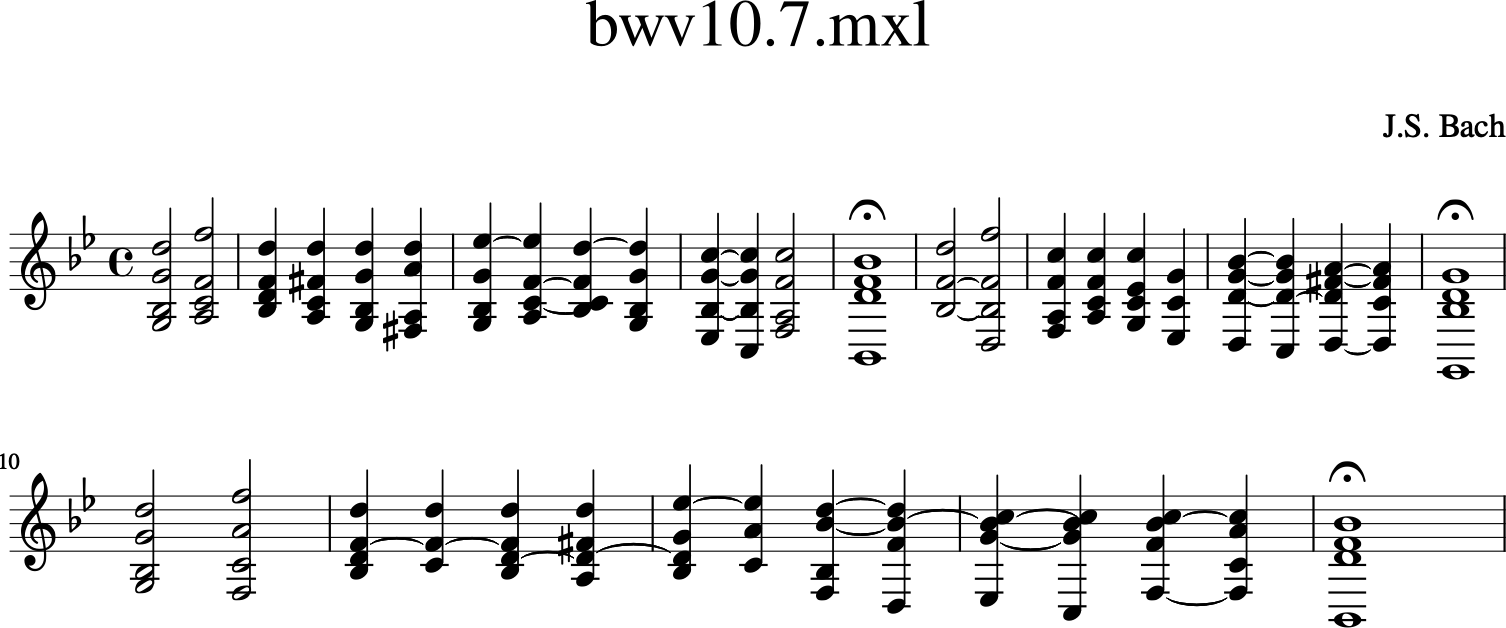

In [159]:
reduction = bwv10.chordify()
reduction.show()


In [45]:
bwv10.analyze('key')


<music21.key.Key of g minor>

In [160]:
for c in reduction.recurse().getElementsByClass('Chord'):
    c.closedPosition(forceOctave=4, inPlace=True)
    c.annotateIntervals()


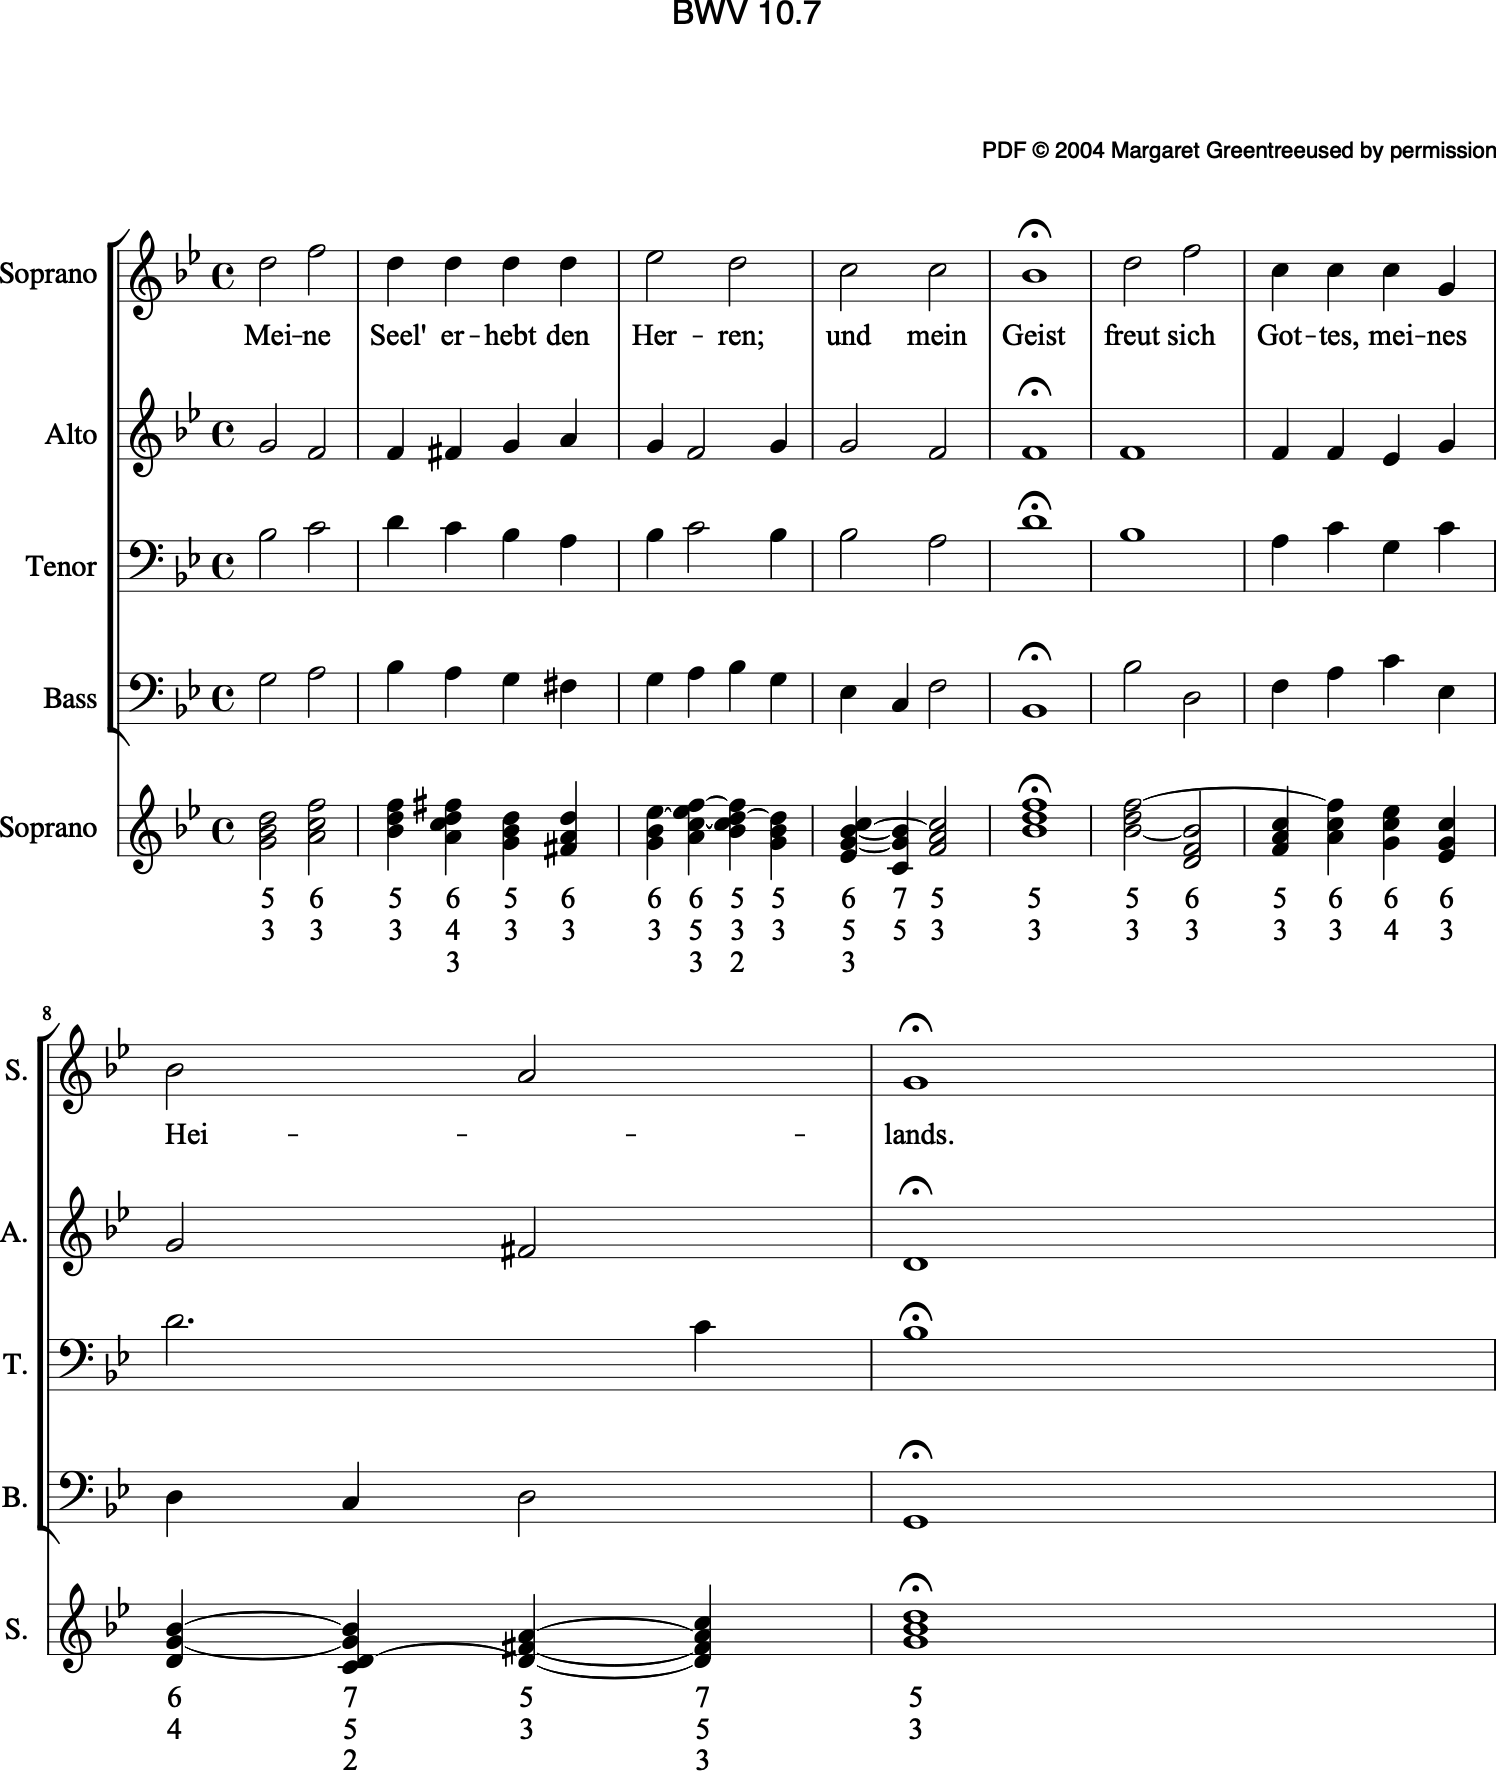

In [161]:
bwv10.insert(0, reduction)
# emptyPart = bwv10.parts[3]
bwv10.remove(emptyPart)
bwv10.show()


In [162]:
# go through the reduction and extract the figures as a list of strings

# container for the figures
listOfFigures = []

# recurse through the reduction and get all chords
for n in reduction.recurse().getElementsByClass('Chord'):

    # remove \n and duplicates since each note in the chord gets the lyrics of the figures
    
    this_figure = '/'.join(set(n.lyric.replace('\n', ''))) 
    
    # append current figure the the list
    
    listOfFigures.append(this_figure)

# test print to see that it works!
print (listOfFigures)

['3/5', '3/6', '3/5', '3/6/4', '3/5', '3/6', '3/6', '3/6/5', '3/5/2', '3/5', '3/6/5', '5/7', '3/5', '3/5', '3/5', '3/6', '3/5', '3/6', '6/4', '3/6', '6/4', '2/5/7', '3/5', '3/5/7', '3/5', '3/5', '3/5', '3/5', '2/4', '3/5', '6/4', '3/6/4', '3/6', '6/4', '3/6', '3/6/5', '5/7', '5/4', '3/5', '3/5', '3', '2', '3', '3/2', '3/5', '5/2/4', '3/5', '3/4', '3', '3/2', '3/5', '6/4', '3/6', '2/5/7', '3/5', '6/4', '6/2/4', '6/2/4', '3/6', '3/4', '3/5/2', '2/4', '3/6', '2/5/7', '6/4', '3/5', '2/4', '3/5']


In [163]:
# use a counter for iteration

counter = 0

# this list will hold the position of 6/3 chords in a row

listOfRepeats = []

while (counter < len(listOfFigures)):
    if (listOfFigures[counter] == '3/6') and (listOfFigures[counter + 1] == '3/6'):
        listOfRepeats.append(str(counter))
        listOfRepeats.append(str(counter + 1))
    counter += 1


In [189]:
listOfRepeats

['5', '6']

In [186]:
s = stream.Stream()

for n in reduction.recurse().getElementsByClass('Chord'):
    s.append (n)



In [187]:
s[5].measureNumber

2

In [188]:
s[5].beat

4.0

In [190]:
z = []
for i in listOfRepeats:
    temp = []
    temp.append(s[int(i)].measureNumber)
    temp.append(s[int(i)].beat)
    z.append (temp)
    

In [191]:
z

[[2, 4.0], [3, 1.0]]

In [202]:
list(bwv10)

[<music21.text.TextBox "PDF © 2004...">,
 <music21.text.TextBox "BWV 10.7">,
 <music21.stream.Part Soprano>,
 <music21.stream.Part Alto>,
 <music21.stream.Part Tenor>,
 <music21.stream.Part Bass>,
 <music21.stream.Part Soprano>,
 <music21.layout.ScoreLayout>,
 <music21.layout.StaffGroup <music21.stream.Part Soprano><music21.stream.Part Alto><music21.stream.Part Tenor><music21.stream.Part Bass>>]

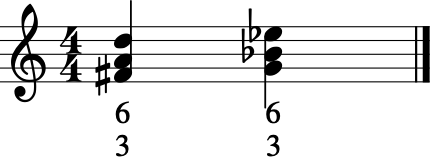

In [192]:
s2 = stream.Stream()

s2.append(s[5])
s2.append(s[6])
s2.show()

In [226]:
str(chorales[2])

'<music21.metadata.bundles.MetadataEntry: bach_bwv101_7_mxl>'

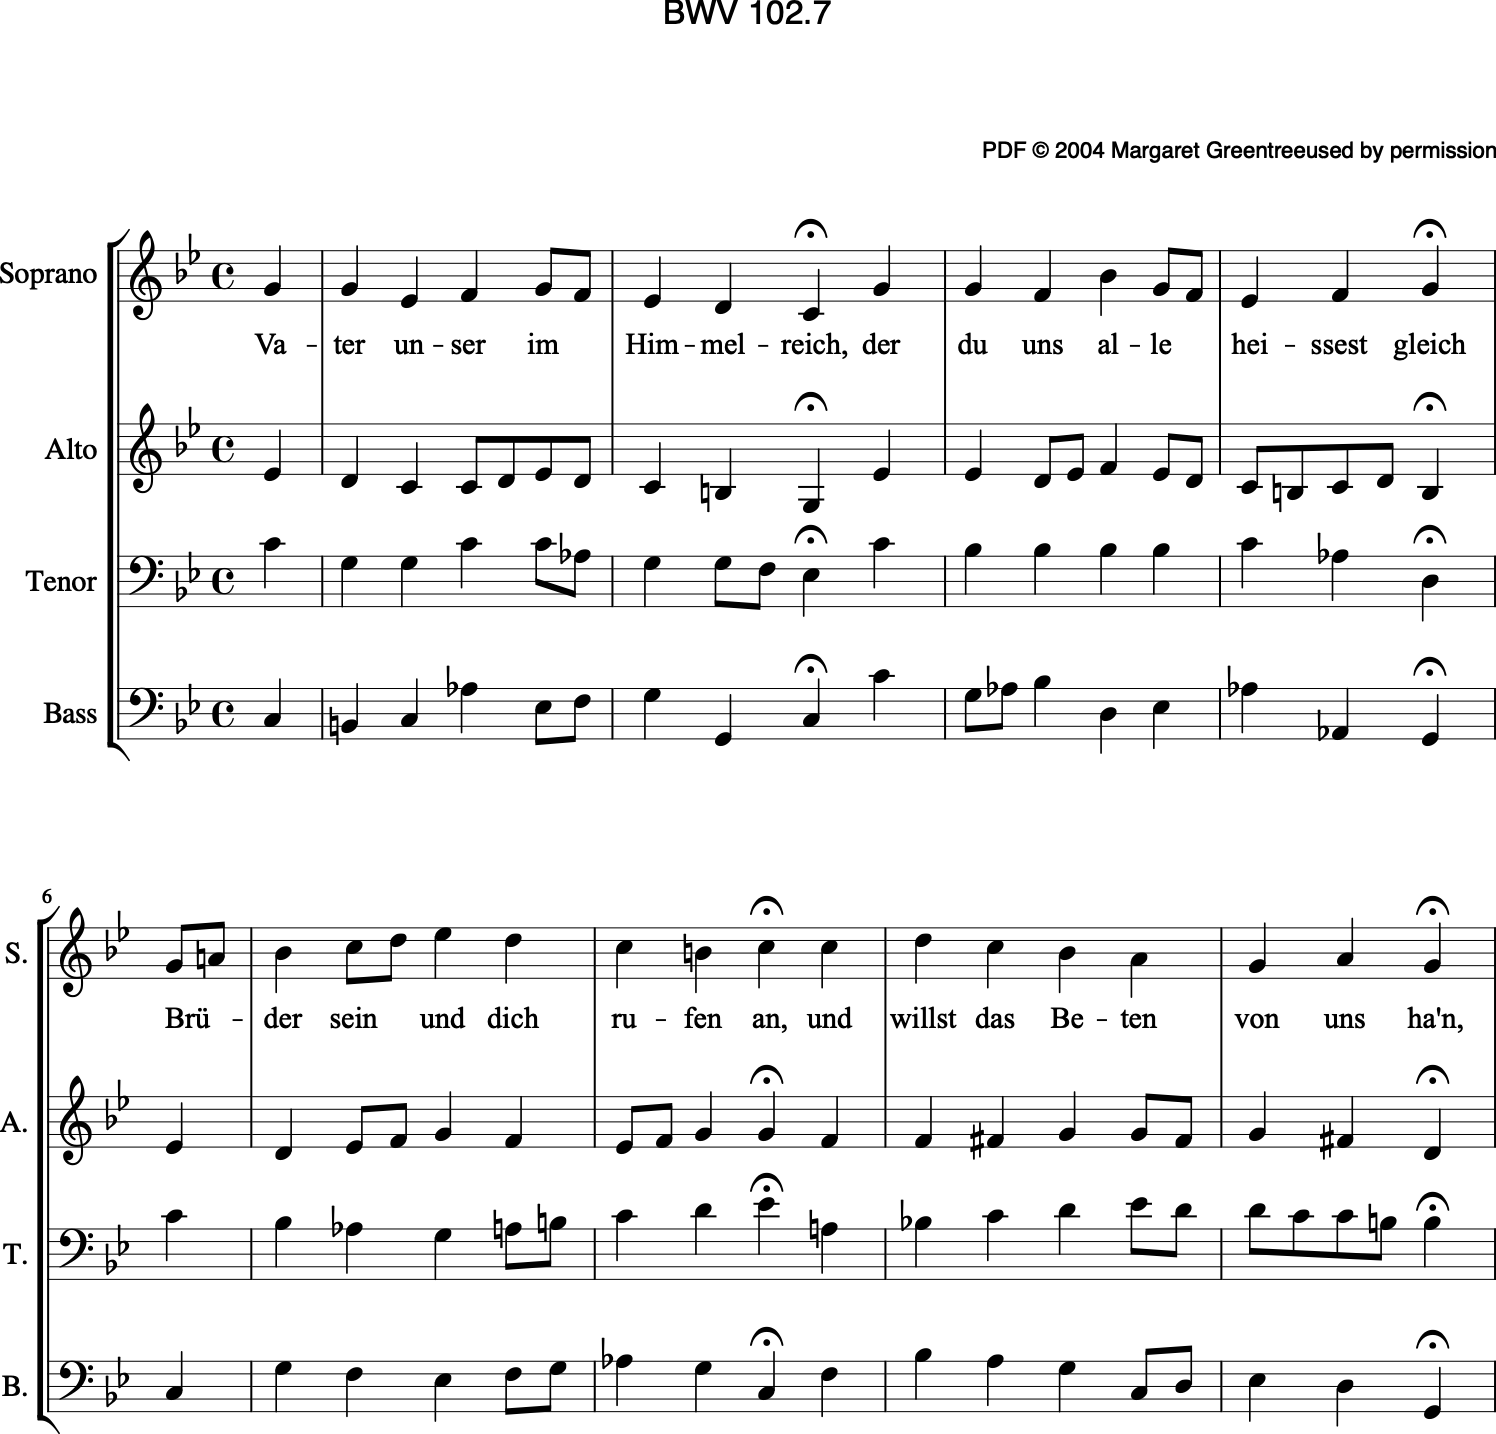

In [235]:
chorales[3].show('xml')